### Telecom Churn Prediction: KNN

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score

### Load Dataset

In [6]:
# import machine learning libraries
telecom = pd.read_csv("telecom_churn.csv")
telecom.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### ML Workflow

- ML Approach
- Data Transformation
- Feature Engineering
- Model Training
- Model Building with KNN
- Model Evaluation


## Data Transformation

In [7]:
# define function --> transform data
def data_transformation(init_dataset, target):
  churn = init_dataset[target]
  init_dataset = init_dataset.drop(columns=[target], axis=1)
  transformed_data = pd.concat([init_dataset, churn], axis=1)
  return transformed_data

In [8]:
# transform data
telecom = data_transformation(telecom, "Churn")
telecom.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


## Feature Engineering

In [9]:
telecom.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,0


Determine feature 1: Customer Lifetime Value(CLV)

+ Average Revenue per User(ARPU):  This can be estimated by taking the average of MonthlyCharge over the AccountWeeks.
+ Average Customer Lifetime(ACL): This can be estimated from the AccountWeeks

formula: CLV=Average Revenue per User (ARPU)×Average Customer Lifetime

In [10]:
# feature 1: average customer lifetyme
telecom["ARPU"] = telecom["MonthlyCharge"]
telecom["CustomerLifeTime"] = telecom["AccountWeeks"]
telecom["CLV"] = telecom["ARPU"] * telecom["CustomerLifeTime"]

Determine feature 2: net promoter score

+ Definition: NPS measures customer satisfaction and loyalty based on the likelihood of recommending a service to others.
+ Calculation: This might require survey data, but if not available, proxy features can be used.
Implementation:
+ Proxy for NPS: Use CustServCalls as a proxy, where a higher number of calls might indicate lower satisfaction.
Derived Feature: You could create an NPS score by assuming a mapping between the number of customer service calls and a promoter/detractor status. 

For example:
+ Promoters: CustServCalls = 0 --> Score 9
+ Passives: CustServCalls = 1 --> Score 7
+ Detractors: CustServCalls > 1 --> Score 3

Alternatively, if NPS scores are directly available, you can include them as-is.

In [11]:
# feature 2: net promoter score
telecom["NPS"] = telecom["CustServCalls"].apply(lambda x: 9 if x==0 else 7 if x==1 else 3)

In [12]:
telecom = data_transformation(telecom, "Churn")
telecom.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,ARPU,CustomerLifeTime,CLV,NPS,Churn
0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0,89.0,128,11392.0,7,0
1,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7,82.0,107,8774.0,7,0
2,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2,52.0,137,7124.0,9,0
3,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6,57.0,84,4788.0,3,0
4,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1,41.0,75,3075.0,3,0


## Model Training

In [13]:
# train the model on X and Y variable
def model_training(telecom_data, testsize): 
  X = telecom_data.drop(columns=["Churn"], axis=1)
  Y = telecom_data["Churn"]

  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=testsize, random_state=1234)
  training = xtrain, ytrain
  testing = xtest, ytest
  return training, testing

In [14]:
training, testing = model_training(telecom, 0.25)
xtrain_tel, ytrain_tel = training
xtest_tel, ytest_tel = testing

for train, test, i in zip(training, testing, list(range(0,1))): 
  print(f"Training: X {train.shape} - Y {train.shape}")
  print(f"Testing: X {test.shape} - Y {test.shape}")

Training: X (2499, 14) - Y (2499, 14)
Testing: X (834, 14) - Y (834, 14)


In [78]:
# model building
def knn_model_building(training, testing, k):
  xtrain, ytrain = training
  xtest, xtest = testing

  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(xtrain, ytrain)
  return knn_model

In [80]:
knn_model1 = knn_model_building(training, testing, 3)
knn_model2 = knn_model_building(training, testing, 8)
knn_model1

KNeighborsClassifier(n_neighbors=3)

### Model Evaluation

In [81]:
# make predictions on model 1 and 2
ypred_tel1 = knn_model1.predict(xtest_tel)
ypred_tel2 = knn_model2.predict(xtest_tel)

In [82]:
# determine accuracy on the model 
acc1 = accuracy_score(ypred_tel1, ytest_tel)
acc2 = accuracy_score(ypred_tel2, ytest_tel)
print(f"Accuracy 1: {acc1} (for k=3)")
print(f"Accuracy 2: {acc2} (for k=8)")

Accuracy 1: 0.8273381294964028 (for k=3)
Accuracy 2: 0.8453237410071942 (for k=8)


In [83]:
# determine confusion matrix
def visualise_conf_matrix(ypred, ytest, axes):
  conf_matrix = confusion_matrix(ypred, ytest)
  conf_mx = sns.heatmap(conf_matrix, annot=True, ax=axes)
  return conf_mx

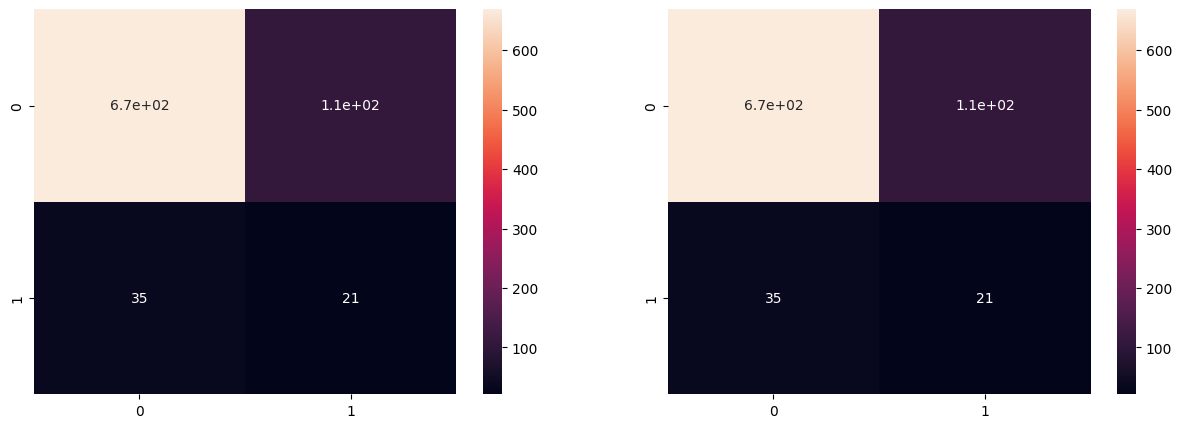

In [84]:
fig, conf_mx = plt.subplots(1,2, figsize=(15,5))
conf_matrix1 = visualise_conf_matrix(ypred_tel1, ytest_tel, conf_mx[0])
conf_matrix2 = visualise_conf_matrix(ypred_tel1, ytest_tel, conf_mx[1])


In [85]:
# classification report for model 1 and 2
report1 = classification_report(ypred_tel1, ypred_tel2)
report2 = classification_report(ypred_tel1, ypred_tel2)
print(f"Report 1: {report1}")
print(f"Report 2: {report2}")

Report 1:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       0.86      0.11      0.19        56

    accuracy                           0.94       834
   macro avg       0.90      0.55      0.58       834
weighted avg       0.93      0.94      0.92       834

Report 2:               precision    recall  f1-score   support

           0       0.94      1.00      0.97       778
           1       0.86      0.11      0.19        56

    accuracy                           0.94       834
   macro avg       0.90      0.55      0.58       834
weighted avg       0.93      0.94      0.92       834



In [96]:
class ModelPerformance(): 
  def __init__(self, training, testing, kvalues): 
    self.training = training
    self.testing = testing
    self.kvalues = kvalues

  def evaluate_performance(self, performance_meth): 
    # initialise parameters to calculate model's perforamnce
    self.perform_metric = []
    xtest, ytest = self.testing

    for k in self.kvalues: 
      model = knn_model_building(self.training, self.testing, k)
      ypred = model.predict(xtest)
      metric = performance_meth(ypred, ytest)
      self.perform_metric.append(metric)
    return self.perform_metric
    

In [99]:
# testcase: evaluate accuracy from class 
kvalues = [k for k in range(1,30)]
mp_object = ModelPerformance(training, testing, kvalues)
accuracies = mp_object.evaluate_performance(accuracy_score)
precisions = mp_object.evaluate_performance(precision_score)
f1_series = mp_object.evaluate_performance(f1_score)

In [100]:
print(f"K values: {kvalues}")
print(f"Accuracies: {accuracies}")
print(f"Precision: {precisions}")
print(f"F1 Score: {f1_series}")

K values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Accuracies: [0.8045563549160671, 0.842925659472422, 0.8273381294964028, 0.8441247002398081, 0.8345323741007195, 0.8453237410071942, 0.8393285371702638, 0.8453237410071942, 0.8453237410071942, 0.8453237410071942, 0.8453237410071942, 0.8465227817745803, 0.8477218225419664, 0.8453237410071942, 0.8465227817745803, 0.8441247002398081, 0.8465227817745803, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081, 0.8453237410071942, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081, 0.8441247002398081]
Precision: [0.24615384615384617, 0.06923076923076923, 0.16153846153846155, 0.046153846153846156, 0.07692307692307693, 0.046153846153846156, 0.046153846153846156, 0.03076923076923077, 0.038461538461538464, 0.023076923076923078, 0.03076923076923077, 0.015384615384615385, 0.03076923076923077,

In [155]:
# visualise knn model performance
def knn_model_visualisation(kvalues, performance_metric, labels,ylabel, title,color, axis): 
  # visualise plot
  perform_plot = axis.plot(kvalues, performance_metric, marker="o", color=color, label=labels[1])
  axis.set_xlabel(labels[0])
  axis.set_ylabel(ylabel)
  axis.set_title(title)
  axis.legend()
  return perform_plot

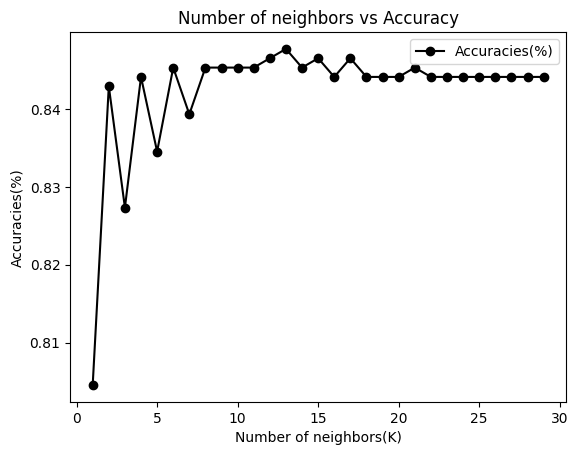

In [158]:
performance = ["accuracy", "precsion", "f1_score"]
fig, perform_plot = plt.subplots()
# plot 1: showing accuracy in relation to number of neighbors
kvalue_label = "Number of neighbors(K)"
acc_label = "Accuracies(%)"
ka_title = "Number of neighbors vs Accuracy"
accuracy_plot = knn_model_visualisation(kvalues, accuracies, [kvalue_label, acc_label], acc_label, ka_title,"black",perform_plot)

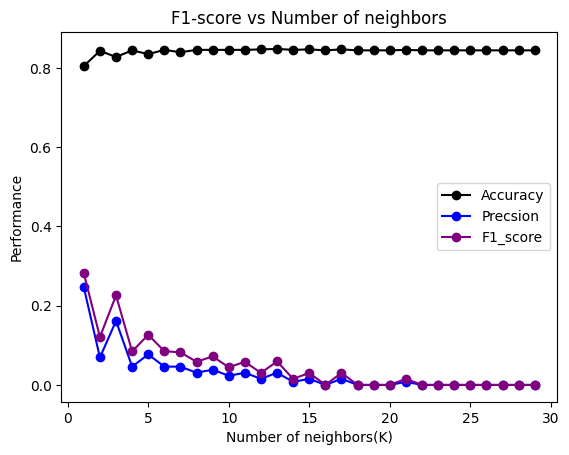

In [163]:
# initialise variable for plotting the model performance
performance = ["Accuracy", "Precsion", "F1_score"]
kvalue_label = "Number of neighbors(K)"
ka_title = "Accuracy vs Number of neighbors"
kp_title = "Precision vs Number of neighbors"
kf_title = "F1-score vs Number of neighbors"

# subplotting
fig, perform_plot = plt.subplots()

# initialise hyperparameter dictionary storing: performance metrics, title as values
perform_param = {performance[0]: (accuracies, ka_title), 
                 performance[1]: (precisions, kp_title), 
                 performance[2]: (f1_series,kf_title)}

# iterate metrics + convert each metric into a graph based on its properties: color, label, title, etc. 
colorlist = ["black", "blue", "purple"]
for (index, (perform_label, param)), color in zip(enumerate(perform_param.items()), colorlist): 
    perform_metric = param[0]
    title = param[1]
    performance_plot = knn_model_visualisation(kvalues,perform_metric, 
                                               [kvalue_label, perform_label],"Performance",
                                               title,color, perform_plot)



In [164]:
def plot_model_performance(perform_param):
  # initialise variable to create performance plot of a model: colorlist
  colorlist = ["black", "blue", "purple"]
  
  # subplotting
  fig, perform_plot = plt.subplots(1, len(performance), figsize=(14,6))

  # iterate metrics + convert each metric into a graph based on its properties: color, label, title, etc. 
  for (index, (perform_label, param)), color in zip(enumerate(perform_param.items()), colorlist): 
    perform_metric = param[0]
    title = param[1]
    performance_plot = knn_model_visualisation(kvalues,perform_metric, 
                                               [kvalue_label, perform_label],
                                               perform_label,title,color, perform_plot[index])
  plt.show()

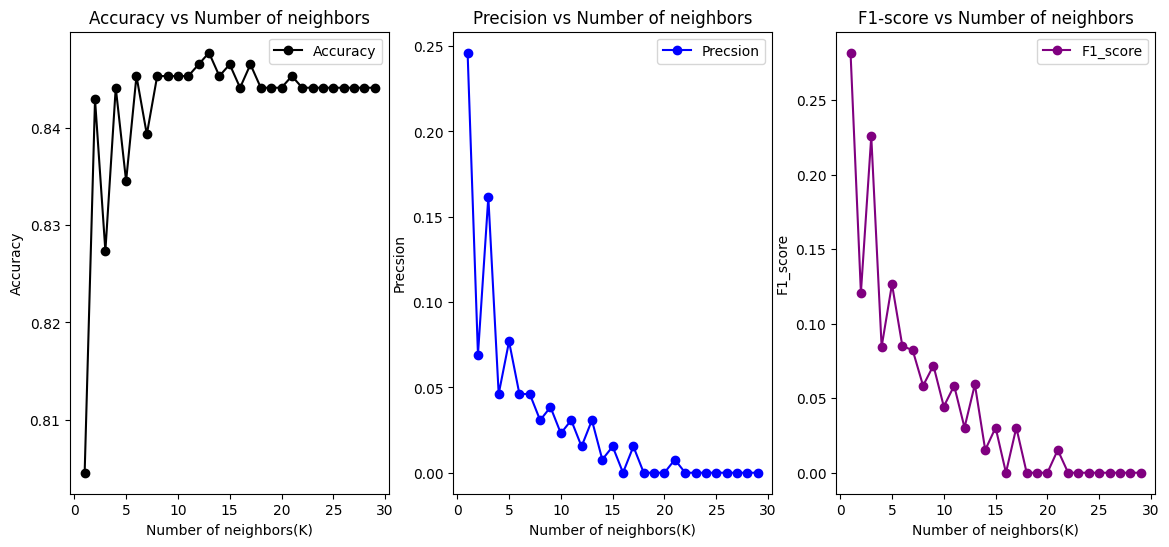

In [165]:
# initialise variable for plotting the model performance
performance = ["Accuracy", "Precsion", "F1_score"]
kvalue_label = "Number of neighbors(K)"
ka_title = "Accuracy vs Number of neighbors"
kp_title = "Precision vs Number of neighbors"
kf_title = "F1-score vs Number of neighbors"

# initialise hyperparameter dictionary storing: performance metrics, title as values
perform_param = {performance[0]: (accuracies, ka_title), 
                 performance[1]: (precisions, kp_title), 
                 performance[2]: (f1_series,kf_title)}

# plot the performance of the model
plot_model_performance(perform_param)

### TO DOs

+ create functions to compute dissimilarity: 
  - euclidian distance
  - manhatten distance
  - minkowski distance
  - cosine disimilarity
+ visualise plot for each dissimilarity to find relationship and patterns from data